<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Промышленность

## Описание проекта

Чтобы оптимизировать производственные расходы, металлургического комбината «Стальная птица» требуется уменьшить потребление электроэнергии на этапе обработки стали. Для этого требуется контролировать температуру сплава.

Задача — построить модель, которая будет её предсказывать. Заказчик хочет использовать разработанную модель для имитации технологического процесса.

### Описание процесса обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены на крышке ковша.

Сначала происходит десульфурация — из стали выводят серу и корректируют её химический состав добавлением примесей. Затем сталь легируют — добавляют в неё куски сплава из бункера для сыпучих материалов или порошковую проволоку через специальный трайб-аппарат.

Прежде чем в первый раз ввести легирующие добавки, специалисты производят химический анализ стали и измеряют её температуру. Потом температуру на несколько минут повышают, уже после этого добавляют легирующие материалы и продувают сталь инертным газом, чтобы перемешать, а затем снова проводят измерения. Такой цикл повторяется до тех пор, пока не будут достигнуты нужный химический состав стали и оптимальная температура плавки.

Дальше расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. slab, «плита»).

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах.

In [1]:
import random 
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import catboost as cb
import torch.nn as nn
from os import listdir
from os.path import isfile, join
from pathlib import Path
from sqlalchemy import create_engine, text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor

In [2]:
# Определим переменные
RANDOM_STATE = 190923
# папка для хранения временных данных
TMP='./cache'
# Использование данных из кэша
USE_CACHE=False

In [3]:
# создаём временный каталог для хранения данных
Path(TMP).mkdir(parents=True, exist_ok=True)

In [4]:
# проверка кэша
onlyfiles = [f for f in listdir(TMP) if isfile(join(TMP, f))]

onlyfiles

['steel.data_arc.csv',
 'steel.data_bulk.csv',
 'steel.data_bulk_time.csv',
 'steel.data_gas.csv',
 'steel.data_temp.csv',
 'steel.data_wire.csv',
 'steel.data_wire_time.csv']

In [5]:
USE_CACHE = len(onlyfiles) > 0

## Подключение к базе данных

In [6]:
db_config = {
    'user': 'praktikum_student',# имя пользователя
    'pwd': 'Sdf4$2;d-d30pp',# пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432,# порт подключения
    'db': 'data-science-final'# название базы данных,
}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

engine = create_engine(connection_string)
conn = engine.connect()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть подключение к базам данных)

In [7]:
query = text('''
SELECT * FROM information_schema.tables AS t
WHERE t.table_schema = 'steel';
''')

tables_df = pd.read_sql_query(query, conn)

tables_df

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,data-science-final,steel,data_arc,BASE TABLE,None,None,None,None,None,YES,NO,None
1,data-science-final,steel,data_bulk,BASE TABLE,None,None,None,None,None,YES,NO,None
2,data-science-final,steel,data_bulk_time,BASE TABLE,None,None,None,None,None,YES,NO,None
3,data-science-final,steel,data_gas,BASE TABLE,None,None,None,None,None,YES,NO,None
4,data-science-final,steel,data_temp,BASE TABLE,None,None,None,None,None,YES,NO,None
5,data-science-final,steel,data_wire,BASE TABLE,None,None,None,None,None,YES,NO,None
6,data-science-final,steel,data_wire_time,BASE TABLE,None,None,None,None,None,YES,NO,None


### Описание данных

База данных состоит из нескольких таблиц:
* steel.data_arc — данные об электродах;
* steel.data_bulk — данные об объёме сыпучих материалов;
* steel.data_bulk_time — данные о времени подачи сыпучих материалов;
* steel.data_gas — данные о продувке сплава газом;
* steel.data_temp — данные об измерениях температуры;
* steel.data_wire — данные об объёме проволочных материалов;
* steel.data_wire_time — данные о времени подачи проволочных материалов.

__Таблица steel.data_arc__
* key — номер партии;
* BeginHeat — время начала нагрева;
* EndHeat — время окончания нагрева;
* ActivePower — значение активной мощности;
* ReactivePower — значение реактивной мощности.

__Таблица steel.data_bulk__
* key — номер партии;
* Bulk1 … Bulk15 — объём подаваемого материала.

__Таблица steel.data_bulk_time__
* key — номер партии;
* Bulk1 … Bulk15 — время подачи материала.

__Таблица steel.data_gas__
* key — номер партии;
* gas — объём подаваемого газа.

__Таблица steel.data_temp__
* key — номер партии;
* MesaureTime — время замера;
* Temperature — значение температуры.

__Таблица steel.data_wire__
* key — номер партии;
* Wire1 … Wire15 — объём подаваемых проволочных материалов.

__Таблица steel.data_wire_time__
* key — номер партии;
* Wire1 … Wire15 — время подачи проволочных материалов.

Во всех таблицах столбец `key` содержит номер партии. В таблицах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

## Первичное исследование таблиц

Чтобы не загружать базу данных запросами, сохраним информацию в "локальном кэше"

In [8]:
# создадим вспомогательные функции

def query_fast(query):
    """
    Быстрое выполнение запроса
    
    Параметры:
    ----------
    query: text - запрос
    """
    return pd.read_sql_query(text(query), conn)

def query_info(query, limit=5):
    """
    Получение простой информации по запросу
    
    Параметры:
    ----------
    query: text - запрос
    where: text - условие
    limit: integer - количество записей для вывода
    """
    table_query = text(f'{query} LIMIT {limit};')
    table_df = pd.read_sql_query(table_query, conn)
    display(table_df)
    
    table_count_query = text(f'{query.replace("*", "COUNT(*)")};')
    table_count_df = pd.read_sql_query(table_count_query, conn)
    print(f"Общее количество записей: {table_count_df.loc[0, 'count']}")

In [9]:
# проверим все талбицы на наличие данных и сохраним результаты в локальное хранилище
tables = [
    'steel.data_arc', 
    'steel.data_bulk', 
    'steel.data_bulk_time', 
    'steel.data_gas', 
    'steel.data_temp', 
    'steel.data_wire', 
    'steel.data_wire_time'
]

if not USE_CACHE:
    for table in tables:
        query_info(f'SELECT * FROM {table}')
    
    # Так как количество данных в таблицах не столь велико, то сохраним данные в кэше
    for table in tables:
        query_fast(f'SELECT * FROM {table}').to_csv(TMP + f'/{table}.csv', index=False)
    
    USE_CACHE = True
else:
    print('Данные будут получены из локального кэша')

Данные будут получены из локального кэша


In [10]:
# закрываем соединение
engine.dispose()

### Данные об электродах

__Таблица steel.data_arc__
* key — номер партии;
* BeginHeat — время начала нагрева;
* EndHeat — время окончания нагрева;
* ActivePower — значение активной мощности;
* ReactivePower — значение реактивной мощности.

In [11]:
data_arc = pd.read_csv(TMP + '/steel.data_arc.csv')

display(data_arc.head())

print()

data_arc.info()

print()

data_arc.describe()

,key,BeginHeat,EndHeat,ActivePower,ReactivePower
0,1,11:02:14,11:06:02,0.976059,0.687084
1,1,11:07:28,11:10:33,0.805607,0.520285
2,1,11:11:44,11:14:36,0.744363,0.498805
3,1,11:18:14,11:24:19,1.659363,1.062669
4,1,11:26:09,11:28:37,0.692755,0.414397



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            14876 non-null  int64  
 1   BeginHeat      14876 non-null  object 
 2   EndHeat        14876 non-null  object 
 3   ActivePower    14876 non-null  float64
 4   ReactivePower  14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB



,key,ActivePower,ReactivePower
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.670441,0.452592
std,934.571502,0.408159,5.878702
min,1.000000,0.030002,-715.504924
25%,806.000000,0.395297,0.290991
50%,1617.000000,0.555517,0.415962
75%,2429.000000,0.857034,0.637371
max,3241.000000,3.731596,2.676388


In [12]:
# определим вспомогательные функции

def total_seconds(x):
    """
    Вспомогательная функция для подсчёта секунд
    
    Параметры:
    ----------
    x: datetime.time
    
    Результат:
    ----------
    int - общее количество секунд
    """

    return (x.hour * 3600) + (x.minute * 60) + x.second

In [13]:
# обработаем поля со временем
data_arc['BeginHeat'] = pd.to_datetime(data_arc['BeginHeat'], format='%H:%M:%S')
data_arc['BeginHeatHour'] = data_arc['BeginHeat'].dt.hour
data_arc['BeginHeat'] = data_arc['BeginHeat'].dt.time

data_arc['EndHeat'] = pd.to_datetime(data_arc['EndHeat'], format='%H:%M:%S')
data_arc['EndHeatHour'] = data_arc['EndHeat'].dt.hour
data_arc['EndHeat'] = data_arc['EndHeat'].dt.time

# переведём временные значения в секунды
data_arc['BeginHeatSeconds'] = data_arc['BeginHeat'].apply(total_seconds)
data_arc['EndHeatSeconds'] = data_arc['EndHeat'].apply(total_seconds)

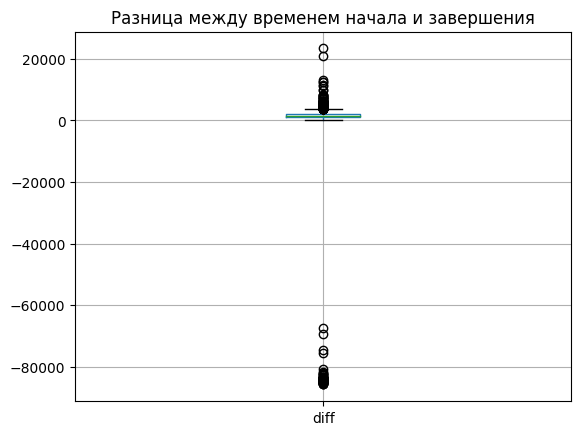

In [14]:
beginHeatSeconds = data_arc.groupby('key').agg({'BeginHeatSeconds': ['first', 'last']})['BeginHeatSeconds']

beginHeatSeconds['diff'] = beginHeatSeconds['last'] - beginHeatSeconds['first']

beginHeatSeconds.boxplot('diff')
plt.title('Разница между временем начала и завершения')
plt.show()

In [15]:
beginHeatSeconds['Transit'] = beginHeatSeconds['diff'] < 0
beginHeatSeconds[beginHeatSeconds['diff'] < 0].head()

,first,last,diff,Transit
key,,,,
18,83910,308,-83602,True
44,79763,4203,-75560,True
45,82957,1280,-81677,True
46,85591,11239,-74352,True
74,85684,754,-84930,True


___Примечание___: при анализе партии видно, что хронология идёт сверху вниз (т.е. первая запись в группе соотвествует первой записи события). На этом выводе и буду основывать дальнейшую обработку.

Продолжим анализ данных. После просмотра колоноки `ReactivePower` выявлено аномальное минимальное значение, изучим подробнее.

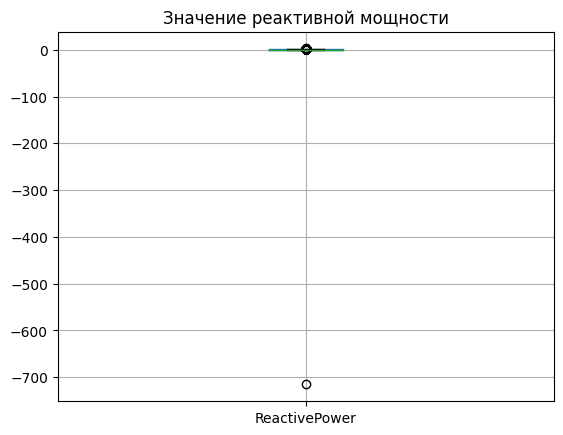

In [16]:
data_arc.boxplot(column=['ReactivePower'])
plt.title('Значение реактивной мощности')
plt.show()

In [17]:
condition = data_arc['ReactivePower'] < -600
data_arc[condition]

,key,BeginHeat,EndHeat,ActivePower,ReactivePower,BeginHeatHour,EndHeatHour,BeginHeatSeconds,EndHeatSeconds
9781,2116,00:44:48,00:46:37,0.495782,-715.504924,0,0,2688,2797


In [18]:
# заменим аномальный всплеск средним значением
data_arc.loc[condition, 'ReactivePower'] = data_arc['ReactivePower'].mean()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что обработано наблюдение с отрицательной реактивной мощностью

Сгененрируем фичи

In [19]:
def diff_seconds(row):
    """
    Вспомогательная функция для подсчёта разницы в секундах
    
    Параметры:
    ----------
    row: Serias
    
    Результат:
    int - секунды
    """
    if row['BeginHeatSeconds'] > row['EndHeatSeconds']:
        return (row['EndHeatSeconds'] + 86400) - row['BeginHeatSeconds']
    else:
        return row['EndHeatSeconds'] - row['BeginHeatSeconds']

In [20]:
# генерация новых признаков
data_arc['DeltaHeatSeconds'] = data_arc.apply(diff_seconds, axis=1)

data_arc['TotalPower'] = data_arc['ActivePower'] + data_arc['ReactivePower']
data_arc['RelPower'] = data_arc['ActivePower'] / data_arc['ReactivePower']

In [21]:
# проверим ещё раз распределение
data_arc[['BeginHeatSeconds', 'EndHeatSeconds', 'DeltaHeatSeconds']].describe()

,BeginHeatSeconds,EndHeatSeconds,DeltaHeatSeconds
count,14876.000000,14876.000000,14876.000000
mean,43148.600027,43192.494689,171.670946
std,24998.711157,24996.782760,98.186803
min,1.000000,7.000000,11.000000
25%,21776.750000,21793.750000,107.000000
50%,42775.000000,42832.000000,147.000000
75%,64685.750000,64730.250000,214.000000
max,86375.000000,86398.000000,907.000000


In [22]:
# признаки по номеру партии
data_arc = data_arc.groupby('key').agg({'ActivePower': 'sum', 'ReactivePower': 'sum', 'BeginHeatSeconds': 'first', 'DeltaHeatSeconds': 'sum', 'TotalPower': 'sum', 'RelPower': 'sum', 'BeginHeat': 'count' })

In [23]:
# добавим отметку о том, что в данной партии есть переход на новые сутки
data_arc = data_arc.merge(beginHeatSeconds['Transit'], how='inner', left_index=True, right_index=True)

In [24]:
data_arc = data_arc.rename(columns= {'BeginHeat':'Iteration'})
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1 to 3241
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ActivePower       3214 non-null   float64
 1   ReactivePower     3214 non-null   float64
 2   BeginHeatSeconds  3214 non-null   int64  
 3   DeltaHeatSeconds  3214 non-null   int64  
 4   TotalPower        3214 non-null   float64
 5   RelPower          3214 non-null   float64
 6   Iteration         3214 non-null   int64  
 7   Transit           3214 non-null   bool   
dtypes: bool(1), float64(4), int64(3)
memory usage: 333.1 KB


In [25]:
data_arc[data_arc['Transit']].head()

,ActivePower,ReactivePower,BeginHeatSeconds,DeltaHeatSeconds,TotalPower,RelPower,Iteration,Transit
key,,,,,,,,
18,3.495351,2.387250,83910,842,5.882601,7.295993,5,True
44,7.612617,5.861980,79763,2063,13.474597,16.005629,12,True
45,9.184464,6.563533,82957,2136,15.747997,14.205720,10,True
46,12.361625,8.369891,85591,2919,20.731517,19.046209,13,True
74,3.415471,2.637693,85684,895,6.053164,6.465400,5,True


В итоге мы получаем следующую таблицу:
* `key` - номер партии;
* `ActivePower` - значение активной мощности;
* `ReactivePower` - значение реактивной мощности;
* `BeginHeatSeconds` - время начала нагрува в секундах;
* `DeltaHeatSeconds` - время нагрува в секундах;
* `TotalPower` - сумма мощностей;
* `RelPower` - соотношение активной мощности к реактивной;
* `Iteration` - количество итераций;
* `Transit` - признак перехода на другие сутки.

### Данные об объёме сыпучих материалов

Таблица steel.data_bulk
* key — номер партии;
* Bulk1 … Bulk15 — объём подаваемого материала.

In [26]:
data_bulk = pd.read_csv(TMP + '/steel.data_bulk.csv')

display(data_bulk.head())

print()

data_bulk.info()

print()

data_bulk.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB



,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [27]:
# установим индекс
data_bulk = data_bulk.set_index('key')

In [28]:
# заполним пропуски
data_bulk = data_bulk.fillna(0)

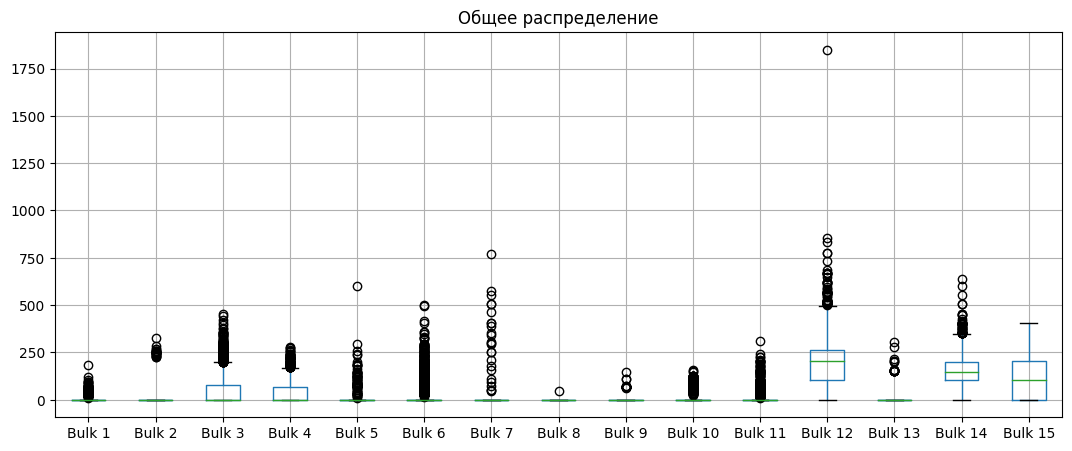

In [29]:
data_bulk.boxplot(figsize=(13, 5))
plt.title('Общее распределение')
plt.show()

In [30]:
# удалим всплеск
condition = (data_bulk['Bulk 12'] > 1000)
print(f'Будет удалено {data_bulk[condition].shape[0]} записей')
data_bulk.drop(data_bulk[condition].index, inplace=True)

Будет удалено 1 записей


### Данные о времени подачи сыпучих материалов

Таблица steel.data_bulk_time
* key — номер партии;
* Bulk1 … Bulk15 — время подачи материала.

In [31]:
data_bulk_time = pd.read_csv(TMP + '/steel.data_bulk_time.csv')

display(data_bulk_time.head())

print()

data_bulk_time.info()

print()

data_bulk_time.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:03:52,NaN,11:03:52,11:03:52
1,2,NaN,NaN,NaN,11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11:40:20,NaN,11:40:20,11:40:20
2,3,NaN,NaN,NaN,12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12:09:40,NaN,12:09:40,12:09:40
3,4,NaN,NaN,NaN,12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12:41:24,NaN,12:41:24,12:41:24
4,5,NaN,NaN,NaN,13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13:12:56,NaN,13:12:56,13:12:56



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB



,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [32]:
# установим индекс
data_bulk_time = data_bulk_time.set_index('key')

In [33]:
cols = data_bulk_time.columns

# приведём переменные Bulk N к типу time
for col in cols:
    if col.find('Bulk') >= 0:
        data_bulk_time[f'{col}'] = pd.to_datetime(data_bulk_time[col], format='%H:%M:%S').dt.time
        data_bulk_time[f'{col}'] = data_bulk_time[f'{col}'].apply(total_seconds)

Убедимся, что подача материала не измеряется сутками

In [34]:
# 1. создадим две вспомогательные функции

def get_min_value_with_nan(row):
    return np.min(row.values, where=~np.isnan(row.values), initial=86400)

def get_max_value_with_nan(row):
    return np.max(row.values, where=~np.isnan(row.values), initial=0)

In [35]:
# 2. выбирем колонки time для обработки
colsTime = []
for col in cols:
    if col.find('Bulk') >= 0:
        colsTime.append(f'{col}')

In [36]:
# 3. определяем максимальное и минимальное значение
data_bulk_time['MinSecond'] = data_bulk_time[colsTime].apply(get_min_value_with_nan, axis=1)
data_bulk_time['MaxSecond'] = data_bulk_time[colsTime].apply(get_max_value_with_nan, axis=1)

In [37]:
# 4. находим разницу
data_bulk_time['DiffSecond'] = data_bulk_time['MaxSecond'] - data_bulk_time['MinSecond']

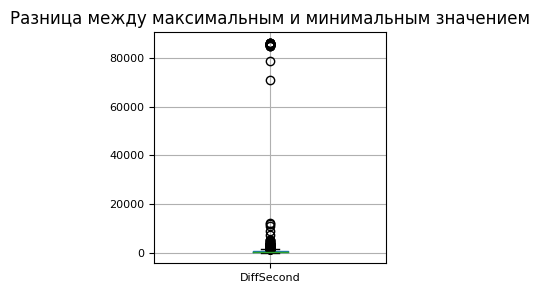

In [38]:
data_bulk_time.boxplot('DiffSecond', figsize=(3, 3), fontsize=8)
plt.title('Разница между максимальным и минимальным значением')
plt.show()

__Вывод__: в результате анализа видны переходы через 00:00, но это не значит, что подача материала идёт сутками.

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошо, что есть промежуточный вывод)

Приведём данные к относительному значению, сколько прошло времени с момента первой подачи материала

In [39]:
condition = data_bulk_time.DiffSecond > 40000
data_bulk_time[condition]

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,MinSecond,MaxSecond,DiffSecond
key,,,,,,,,,,,,,,,,,,
44,NaN,NaN,NaN,NaN,NaN,81228.0,NaN,NaN,NaN,NaN,NaN,2375.0,2375.0,80142.0,2375.0,2375.0,81228.0,78853.0
74,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86007.0,NaN,86007.0,86007.0,110.0,86007.0,85897.0
126,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85615.0,NaN,85615.0,85615.0,1.0,85615.0,85614.0
232,NaN,NaN,NaN,NaN,93.0,NaN,NaN,NaN,NaN,NaN,NaN,85813.0,NaN,85813.0,85813.0,93.0,85813.0,85720.0
280,NaN,NaN,85906.0,NaN,NaN,NaN,NaN,NaN,296.0,NaN,NaN,84203.0,NaN,84203.0,NaN,296.0,85906.0,85610.0
641,NaN,NaN,NaN,3792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74523.0,74523.0,NaN,74523.0,3792.0,74523.0,70731.0
642,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86175.0,NaN,86175.0,86175.0,1367.0,86175.0,84808.0
913,NaN,NaN,763.0,NaN,NaN,763.0,NaN,NaN,NaN,NaN,NaN,86258.0,NaN,86258.0,NaN,763.0,86258.0,85495.0
999,NaN,NaN,269.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86189.0,NaN,86189.0,86189.0,269.0,86189.0,85920.0


In [40]:
# находим минимальное значение среди "переходной партии"
min_value = data_bulk_time.loc[condition, ['MinSecond']].max()['MinSecond']
min_value

3792.0

In [41]:
data_bulk_time = data_bulk_time.fillna(-1)

for col in colsTime:
    data_bulk_time.loc[condition, col] = data_bulk_time.loc[condition, col].apply(lambda x: x + 86400 if min_value >= x and x >= 0 else x)
    
# удалим ранее созданные временные данные
data_bulk_time.drop(columns=['MinSecond', 'MaxSecond', 'DiffSecond'], inplace=True)

In [42]:
data_bulk_time[condition].head()

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
key,,,,,,,,,,,,,,,
44,-1.0,-1.0,-1.0,-1.0,-1.0,81228.0,-1.0,-1.0,-1.0,-1.0,-1.0,88775.0,88775.0,80142.0,88775.0
74,-1.0,-1.0,-1.0,86510.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,86007.0,-1.0,86007.0,86007.0
126,-1.0,-1.0,86401.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,85615.0,-1.0,85615.0,85615.0
232,-1.0,-1.0,-1.0,-1.0,86493.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,85813.0,-1.0,85813.0,85813.0
280,-1.0,-1.0,85906.0,-1.0,-1.0,-1.0,-1.0,-1.0,86696.0,-1.0,-1.0,84203.0,-1.0,84203.0,-1.0


In [43]:
def get_min_value(row):
    a = np.array(row.values)
    min_value = a[a >= 0].min()
    return min_value

data_bulk_time['MinSecond'] = data_bulk_time[colsTime].apply(get_min_value, axis=1)

for col in colsTime:
    data_bulk_time[col] = data_bulk_time.apply(lambda x: x[col] - x['MinSecond'] if x[col] >= 0 else x[col], axis=1)

In [44]:
data_bulk_time[condition].head()

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15,MinSecond
key,,,,,,,,,,,,,,,,
44,-1.0,-1.0,-1.0,-1.0,-1.0,1086.0,-1.0,-1.0,-1.0,-1.0,-1.0,8633.0,8633.0,0.0,8633.0,80142.0
74,-1.0,-1.0,-1.0,503.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,86007.0
126,-1.0,-1.0,786.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,85615.0
232,-1.0,-1.0,-1.0,-1.0,680.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,85813.0
280,-1.0,-1.0,1703.0,-1.0,-1.0,-1.0,-1.0,-1.0,2493.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,84203.0


In [45]:
data_bulk_time.drop(columns=['MinSecond'], inplace=True)

In [46]:
# проверим распределение
data_bulk_time.describe()

,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000
mean,23.870566,0.543624,270.593161,207.308405,12.314797,118.364653,1.830617,-0.630233,7.678811,34.566315,38.582295,17.319271,6.113135,3.697028,16.024609
std,122.000556,40.063091,557.716422,533.844217,126.123413,353.285252,50.752566,20.683812,119.946557,204.612086,243.738618,192.667840,263.119545,76.063766,273.290559
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
75%,-1.000000,-1.000000,402.000000,300.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
max,2000.000000,1859.000000,12201.000000,15669.000000,3504.000000,5348.000000,1859.000000,1156.000000,2527.000000,4216.000000,8999.000000,8633.000000,11782.000000,2699.000000,11394.000000


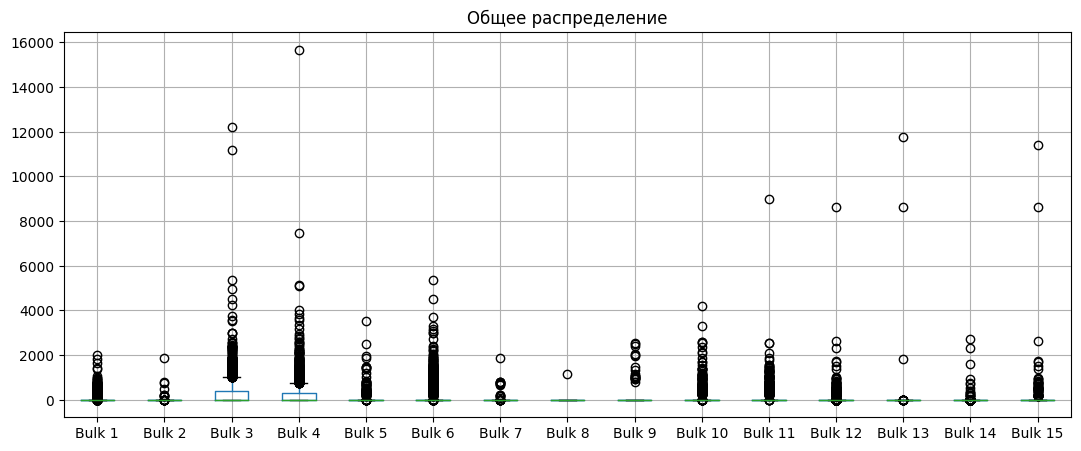

In [47]:
data_bulk_time.boxplot(figsize=(13, 5))
plt.title('Общее распределение')
plt.show()

Удалим выбросы

In [48]:
condition = (data_bulk_time['Bulk 3'] > 6000) | \
            (data_bulk_time['Bulk 4'] > 6000) | \
            (data_bulk_time['Bulk 11'] > 6000) | \
            (data_bulk_time['Bulk 12'] > 6000) | \
            (data_bulk_time['Bulk 13'] > 6000) | \
            (data_bulk_time['Bulk 15'] > 6000)
print(f'Будет удалено {data_bulk_time[condition].shape[0]} записей')
data_bulk_time.drop(data_bulk_time[condition].index, inplace=True)

Будет удалено 7 записей


__Вывод__: таким образом мы сгенерировали фичи, которые показывают сколько секунд прошло с момента добавления первого материала

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошо, что есть промежуточный вывод)

### Данные о продувке сплава газом

Таблица steel.data_gas
* key — номер партии;
* gas — объём подаваемого газа.

In [49]:
data_gas = pd.read_csv(TMP + '/steel.data_gas.csv')

display(data_gas.head())

print()

data_gas.info()

print()

data_gas.describe()

,key,gas
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas     3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB



,key,gas
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [50]:
# установим индекс
data_gas = data_gas.set_index('key')

In [51]:
data_gas.columns = ['Gas']

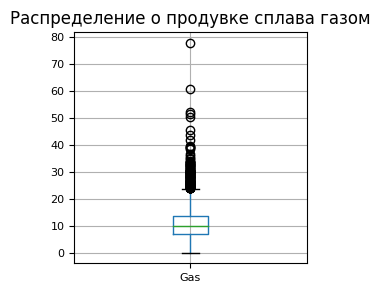

In [52]:
data_gas.boxplot('Gas', figsize=(3, 3), fontsize=8)
plt.title('Распределение о продувке сплава газом')
plt.show()

In [53]:
condition = data_gas['Gas'] > 60
data_gas[condition]

,Gas
key,
280,60.935689
322,77.995040


Выявленные всплески заменим на средние значения 

In [54]:
data_gas.loc[condition, 'Gas'] = data_gas['Gas'].mean()

### Данные об измерениях температуры

Таблица steel.data_temp
* key — номер партии;
* MesaureTime — время замера;
* Temperature — значение температуры.

In [55]:
data_temp = pd.read_csv(TMP + '/steel.data_temp.csv')

display(data_temp.head())

print()

data_temp.info()

print()

data_temp.describe()

,key,MesaureTime,Temperature
0,1,11:16:18,1571.0
1,1,11:25:53,1604.0
2,1,11:29:11,1618.0
3,1,11:30:01,1601.0
4,1,11:30:39,1613.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          15907 non-null  int64  
 1   MesaureTime  15907 non-null  object 
 2   Temperature  13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB



,key,Temperature
count,15907.000000,13006.000000
mean,1607.880870,1591.840920
std,942.212073,21.375851
min,1.000000,1191.000000
25%,790.000000,1581.000000
50%,1618.000000,1591.000000
75%,2427.000000,1601.000000
max,3241.000000,1705.000000


In [56]:
# установим индекс
data_temp = data_temp.set_index('key')

In [57]:
data_temp.head()

,MesaureTime,Temperature
key,,
1,11:16:18,1571.0
1,11:25:53,1604.0
1,11:29:11,1618.0
1,11:30:01,1601.0
1,11:30:39,1613.0


Проверим температуру

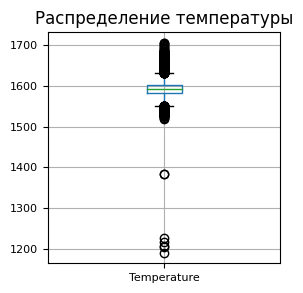

In [58]:
data_temp.boxplot('Temperature', figsize=(3, 3), fontsize=8)
plt.title('Распределение температуры')
plt.show()

In [59]:
# удалим аномально низкие значениея температуры в 1500
condition = data_temp['Temperature'] < 1500
data_temp[condition]

,MesaureTime,Temperature
key,,
867,14:21:00,1191.0
1214,05:32:00,1208.0
1619,11:03:54,1218.0
1818,00:30:49,1383.0
1818,00:31:40,1383.0
2052,14:51:40,1227.0
2561,07:34:15,1204.0


In [60]:
# заменим медианной
data_temp.loc[condition, 'Temperature'] = data_temp['Temperature'].mean()

In [61]:
# выбирем только те значения, котрые содержат как минимум два наблюдения
data_temp_filter = data_temp.groupby('key').filter(lambda x: x['Temperature'].count() > 1)

data_temp_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12265 entries, 1 to 2499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MesaureTime  12265 non-null  object 
 1   Temperature  12265 non-null  float64
dtypes: float64(1), object(1)
memory usage: 287.5+ KB


__Примечание__: получение последней температуры в партии основывается на том, что в выборке данные уже отсортированы в правильном порядке 

In [62]:
# гарантируем, что значение температуры для целевого значения должно быть последним
data_temp = data_temp_filter.groupby('key').agg({ 'Temperature': ['last', 'first'] })
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 1 to 2499
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Temperature, last)   2475 non-null   float64
 1   (Temperature, first)  2475 non-null   float64
dtypes: float64(2)
memory usage: 58.0 KB


In [63]:
data_temp.head()

Temperature        
           last   first
key                    
1        1613.0  1571.0
2        1602.0  1581.0
3        1599.0  1596.0
4        1625.0  1601.0
5        1602.0  1576.0

In [64]:
data_temp = data_temp['Temperature']
data_temp.columns = ['TemperatureLast', 'TemperatureFirst']

In [65]:
data_temp.head()

,TemperatureLast,TemperatureFirst
key,,
1,1613.0,1571.0
2,1602.0,1581.0
3,1599.0,1596.0
4,1625.0,1601.0
5,1602.0,1576.0


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Целевой признак выбран корректно

### Данные об объёме проволочных материалов

Таблица steel.data_wire
* key — номер партии;
* Wire1 … Wire15 — объём подаваемых проволочных материалов.

In [66]:
data_wire = pd.read_csv(TMP + '/steel.data_wire.csv')

display(data_wire.head())

print()

data_wire.info()

print()

data_wire.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB



,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060484,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [67]:
# установим индекс
data_wire = data_wire.set_index('key')

In [68]:
# заполним пропуски
data_wire = data_wire.fillna(0)

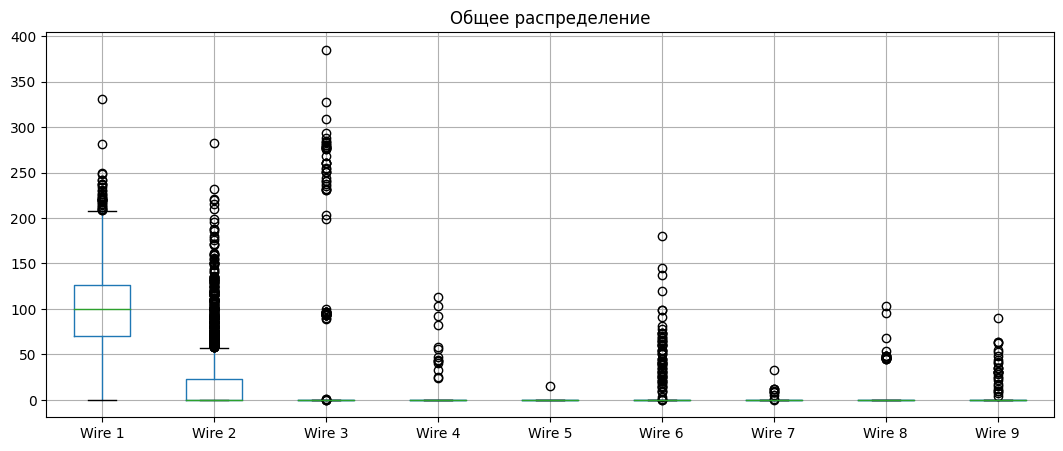

In [69]:
data_wire.boxplot(figsize=(13, 5))
plt.title('Общее распределение')
plt.show()

### Данные о времени подачи проволочных материалов

Таблица steel.data_wire_time
* key — номер партии;
* Wire1 … Wire15 — время подачи проволочных материалов.

In [70]:
data_wire_time = pd.read_csv(TMP + '/steel.data_wire_time.csv')

display(data_wire_time.head())

print()

data_wire_time.info()

print()

data_wire_time.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,13:18:15,13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB



,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


In [71]:
# установим индекс
data_wire_time = data_wire_time.set_index('key')

In [72]:
cols = data_wire_time.columns

# приведём переменные Bulk N к типу time
for col in cols:
    if col.find('Wire') >= 0:
        data_wire_time[f'{col}'] = pd.to_datetime(data_wire_time[col], format='%H:%M:%S').dt.time
        data_wire_time[f'{col}'] = data_wire_time[f'{col}'].apply(total_seconds)

In [73]:
# 2. выбирем колонки time для обработки
colsTime = []
for col in cols:
    colsTime.append(f'{col}')

In [74]:
# 3. определяем максимальное и минимальное значение
data_wire_time['MinSecond'] = data_wire_time[colsTime].apply(get_min_value_with_nan, axis=1)
data_wire_time['MaxSecond'] = data_wire_time[colsTime].apply(get_max_value_with_nan, axis=1)

In [75]:
data_wire_time

,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,MinSecond,MaxSecond
key,,,,,,,,,,,
1,40301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40301.0,40301.0
2,42370.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42370.0,42370.0
3,44027.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44027.0,44027.0
4,46085.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46085.0,46085.0
5,47895.0,48726.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47895.0,48726.0
...,...,...,...,...,...,...,...,...,...,...,...
3237,82220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82220.0,82220.0
3238,85104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85104.0,85104.0
3239,6643.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6643.0,6643.0


In [76]:
# 4. находим разницу
data_wire_time['DiffSecond'] = data_wire_time['MaxSecond'] - data_wire_time['MinSecond']

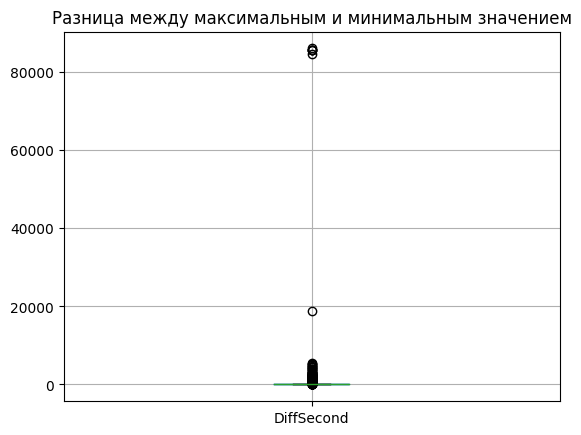

In [77]:
data_wire_time.boxplot('DiffSecond')
plt.title('Разница между максимальным и минимальным значением')
plt.show()

__Вывод__: в результате анализа видны переходы через 00:00, но это не значит, что подача материала идёт сутками.

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошо, что есть промежуточный вывод)

Приведём данные к относительному значению, сколько прошло времени с момента первой подачи материала

In [78]:
condition = data_wire_time['DiffSecond'] > 40000
data_wire_time[condition]

,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,MinSecond,MaxSecond,DiffSecond
key,,,,,,,,,,,,
280,85241.0,85924.0,NaN,NaN,NaN,NaN,NaN,212.0,NaN,212.0,85924.0,85712.0
421,86304.0,598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,598.0,86304.0,85706.0
745,86162.0,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.0,86162.0,86046.0
1292,85254.0,676.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,676.0,85254.0,84578.0
1875,85887.0,338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.0,85887.0,85549.0
2725,85927.0,NaN,NaN,NaN,NaN,273.0,NaN,NaN,NaN,273.0,85927.0,85654.0


In [79]:
# находим минимальное значение среди "переходной партии"
min_value = data_wire_time.loc[condition, ['MinSecond']].max()['MinSecond']
min_value

676.0

In [80]:
data_wire_time = data_wire_time.fillna(-1)

for col in colsTime:
    data_wire_time.loc[condition, col] = data_wire_time.loc[condition, col].apply(lambda x: x + 86400 if min_value >= x and x >= 0 else x)
    
# удалим ранее созданные временные данные
data_wire_time.drop(columns=['MinSecond', 'MaxSecond', 'DiffSecond'], inplace=True)

In [81]:
data_wire_time[condition].head()

,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,,,,,,,,,
280,85241.0,85924.0,-1.0,-1.0,-1.0,-1.0,-1.0,86612.0,-1.0
421,86304.0,86998.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
745,86162.0,86516.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1292,85254.0,87076.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1875,85887.0,86738.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [82]:
data_wire_time['MinSecond'] = data_wire_time[colsTime].apply(get_min_value, axis=1)

for col in colsTime:
    data_wire_time[col] = data_wire_time.apply(lambda x: x[col] - x['MinSecond'] if x[col] >= 0 else x[col], axis=1)

In [83]:
data_wire_time[condition].head()

,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9,MinSecond
key,,,,,,,,,,
280,0.0,683.0,-1.0,-1.0,-1.0,-1.0,-1.0,1371.0,-1.0,85241.0
421,0.0,694.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,86304.0
745,0.0,354.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,86162.0
1292,0.0,1822.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,85254.0
1875,0.0,851.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,85887.0


In [84]:
data_wire_time.drop(columns=['MinSecond'], inplace=True)

In [85]:
# проверим распределение
data_wire_time.describe()

,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000
mean,24.410256,105.512821,22.220058,0.249919,0.697176,5.333333,17.366115,5.663421,1.440766
std,418.345890,305.959638,207.615054,25.875009,94.204748,96.542038,404.199767,94.476480,40.779863
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,0.000000,67.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,18756.000000,5271.000000,3770.000000,835.000000,5228.000000,3973.000000,18485.000000,2361.000000,1531.000000


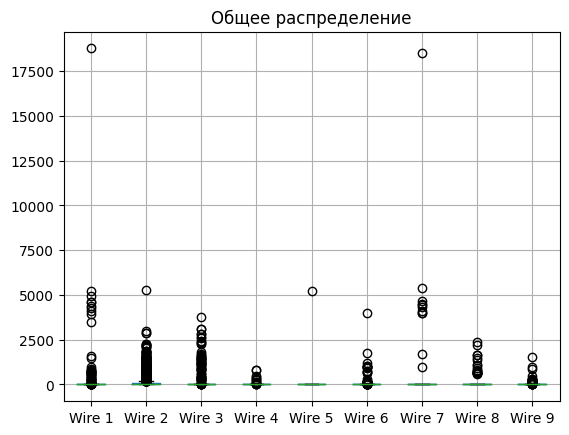

In [86]:
data_wire_time.boxplot()
plt.title('Общее распределение')
plt.show()

Удалим всплески на `Wire 1` и `Wire 7`

In [87]:
condition = (data_wire_time['Wire 1'] > 10000) | (data_wire_time['Wire 7'] > 10000)
print(f'Будет удалено {data_wire_time[condition].shape[0]} записей')
data_wire_time.drop(data_wire_time[condition].index, inplace=True)

Будет удалено 1 записей


__Вывод__: таким образом мы сгенерировали фичи, которые показывают сколько секунд прошло с момента добавления первого материала

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Верно!👍:\
</b> Мне интересно было изучить проведенный исследовательский анализ данных, твои графики, осмысленный и красочный графический анализ. Найдены очень интересные закономерности)

## Объединение данных

Ещё раз определимся со списком таблиц:
* steel.data_arc — данные об электродах;
* steel.data_bulk — данные об объёме сыпучих материалов;
* steel.data_bulk_time — данные о времени подачи сыпучих материалов;
* steel.data_gas — данные о продувке сплава газом;
* steel.data_temp — данные об измерениях температуры;
* steel.data_wire — данные об объёме проволочных материалов;
* steel.data_wire_time — данные о времени подачи проволочных материалов.

In [88]:
dfs = [('data_arc', data_arc), 
       ('data_bulk', data_bulk), 
       ('data_bulk_time', data_bulk_time), 
       ('data_gas', data_gas), 
       ('data_temp', data_temp), 
       ('data_wire', data_wire), 
       ('data_wire_time', data_wire_time)]

for df in dfs:
    print(f'{df[0]} {df[1].shape[0]}')

data_arc 3214
data_bulk 3128
data_bulk_time 3122
data_gas 3239
data_temp 2475
data_wire 3081
data_wire_time 3080


In [89]:
# объединение данных
df = data_arc.merge(data_bulk, how='inner', left_index=True, right_index=True)

# переименуем колонки
cols = [f'{col} Time' for col in data_bulk_time.columns]
data_bulk_time.columns = cols

df = df.merge(data_bulk_time, how='inner', left_index=True, right_index=True)

df = df.merge(data_gas, how='inner', left_index=True, right_index=True)

df = df.merge(data_temp, how='inner', left_index=True, right_index=True)

df = df.merge(data_wire, how='inner', left_index=True, right_index=True)

cols = [f'{col} Time' for col in data_wire_time.columns]
data_wire_time.columns = cols

df = df.merge(data_wire_time, how='inner', left_index=True, right_index=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 1 to 2499
Data columns (total 59 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ActivePower       2321 non-null   float64
 1   ReactivePower     2321 non-null   float64
 2   BeginHeatSeconds  2321 non-null   int64  
 3   DeltaHeatSeconds  2321 non-null   int64  
 4   TotalPower        2321 non-null   float64
 5   RelPower          2321 non-null   float64
 6   Iteration         2321 non-null   int64  
 7   Transit           2321 non-null   bool   
 8   Bulk 1            2321 non-null   float64
 9   Bulk 2            2321 non-null   float64
 10  Bulk 3            2321 non-null   float64
 11  Bulk 4            2321 non-null   float64
 12  Bulk 5            2321 non-null   float64
 13  Bulk 6            2321 non-null   float64
 14  Bulk 7            2321 non-null   float64
 15  Bulk 8            2321 non-null   float64
 16  Bulk 9            2321 non-null   float64


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Хорошо, партии, для которых не все замеры температуры известны удалены

In [91]:
print(f'Общий размер результирующей таблицы {df.shape}')

Общий размер результирующей таблицы (2321, 59)


### Исследовательский анализ

In [92]:
df.describe()

,ActivePower,ReactivePower,BeginHeatSeconds,DeltaHeatSeconds,TotalPower,RelPower,Iteration,Bulk 1,Bulk 2,Bulk 3,...,Wire 9,Wire 1 Time,Wire 2 Time,Wire 3 Time,Wire 4 Time,Wire 5 Time,Wire 6 Time,Wire 7 Time,Wire 8 Time,Wire 9 Time
count,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,...,2321.000000,2321.000000,2321.000000,2321.000000,2321.000000,2321.0,2321.000000,2321.000000,2321.000000,2321.000000
mean,3.131893,2.334350,42427.124515,802.401120,5.466243,6.377425,4.672124,3.332615,1.323137,47.303748,...,0.318206,11.560103,106.229642,17.000431,0.125808,-1.0,4.534252,3.651874,4.294270,1.166738
std,1.367381,1.031102,24931.091485,325.507696,2.372341,2.241541,1.543547,11.781876,18.450465,75.307373,...,3.462465,173.458618,316.151365,179.676725,23.707951,0.0,99.458095,146.500292,79.913849,37.041743
min,0.186226,0.158247,12.000000,57.000000,0.361557,0.980955,1.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.171502,1.625992,20809.000000,580.000000,3.808692,4.952424,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000
50%,3.023916,2.233858,42045.000000,777.000000,5.264312,6.084114,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000
75%,3.908043,2.906558,63692.000000,991.000000,6.817314,7.734968,6.000000,0.000000,0.000000,80.000000,...,0.000000,0.000000,67.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000
max,12.361625,9.866436,86275.000000,2919.000000,21.254146,19.046209,13.000000,94.000000,325.000000,454.000000,...,62.025600,5238.000000,5271.000000,3770.000000,835.000000,-1.0,3973.000000,5394.000000,2361.000000,1531.000000


Построим график распределения всех признаков

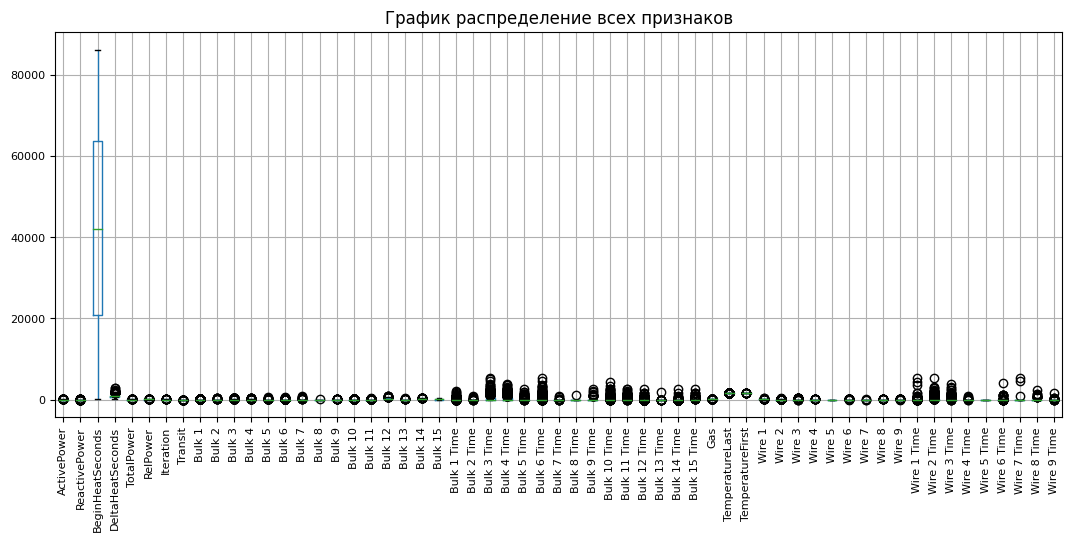

In [93]:
df.boxplot(figsize=(13, 5), fontsize=8, rot=90)
plt.title('График распределение всех признаков')
plt.show()

__Примечание__: один признак `BeginHeatSeconds` имеет очень большие значения, для наглядности уберём его

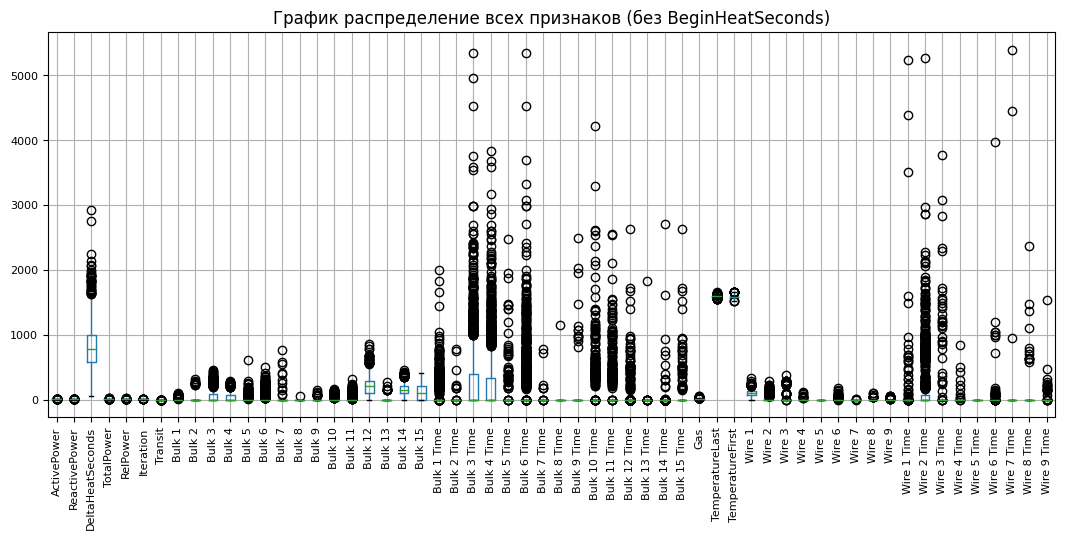

In [94]:
df.drop(columns=['BeginHeatSeconds']).boxplot(figsize=(13, 5), fontsize=8, rot=90)
plt.title('График распределение всех признаков (без BeginHeatSeconds)')
plt.show()

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера     <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
После объединения таблиц, для итогового датафрейма нужно вывести графики распределения (или боксплоты) ВСЕХ признаков
    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Добавил графики распределения признаков
</div> 

По некоторым временным значениям есть пропуски (значения -1), возможно эти колонки непривносят ничего. Посмотрим далее на корреляцию

In [95]:
# возьмём значения по модулю и отсортируем значения по убыванию
df.corr()['TemperatureLast'].abs().sort_values(ascending=False)

TemperatureLast     1.000000
Wire 1              0.320833
ActivePower         0.312195
TemperatureFirst    0.308767
DeltaHeatSeconds    0.301691
TotalPower          0.295606
Bulk 15             0.267377
ReactivePower       0.266111
Bulk 12             0.264750
RelPower            0.236867
Wire 2              0.213876
Iteration           0.202025
Bulk 4 Time         0.201137
Bulk 4              0.191028
Bulk 6              0.183983
Wire 1 Time         0.148505
Bulk 6 Time         0.145258
Wire 4              0.132889
Wire 7 Time         0.131470
Wire 7              0.128706
Bulk 11             0.113673
Bulk 14             0.106025
Bulk 7              0.095993
Bulk 1              0.083553
Bulk 10 Time        0.082837
Bulk 7 Time         0.073671
Bulk 11 Time        0.071236
Wire 6              0.071033
Gas                 0.066236
Bulk 10             0.061233
Bulk 2              0.059650
Bulk 2 Time         0.050971
Bulk 15 Time        0.043136
Wire 3              0.041509
Bulk 5 Time   

Для дальнейшего анализа будем использовать колонки, чья корреляция выше `0.1`

In [96]:
df_corr = df.corr()['TemperatureLast'].abs().reset_index()

columns = list(df_corr.loc[df_corr['TemperatureLast'] > 0.1, 'index'])

df = df.loc[:, columns]

Посмотрим более внимательно на признаки, которые далее потенциально могут использоваьтся в обучении

In [97]:
df.corr()

,ActivePower,ReactivePower,DeltaHeatSeconds,TotalPower,RelPower,Iteration,Bulk 4,Bulk 6,Bulk 11,Bulk 12,...,Bulk 4 Time,Bulk 6 Time,TemperatureLast,TemperatureFirst,Wire 1,Wire 2,Wire 4,Wire 7,Wire 1 Time,Wire 7 Time
ActivePower,1.000000,0.955771,0.976434,0.991796,0.739216,0.744716,-0.029509,0.130185,0.065513,0.477079,...,0.115500,0.231643,0.312195,-0.461466,0.051034,0.049293,0.006602,0.009270,0.014576,0.004370
ReactivePower,0.955771,1.000000,0.962571,0.985527,0.646211,0.734585,-0.032261,0.122533,0.072024,0.456330,...,0.118434,0.241144,0.266111,-0.438908,0.018397,0.045330,0.019396,0.022866,0.027382,0.019231
DeltaHeatSeconds,0.976434,0.962571,1.000000,0.981168,0.750380,0.784337,-0.026990,0.139804,0.073803,0.463279,...,0.129569,0.250119,0.301691,-0.411688,0.057562,0.047288,0.009517,0.016446,0.017544,0.009889
TotalPower,0.991796,0.985527,0.981168,1.000000,0.706939,0.748519,-0.031030,0.128294,0.069065,0.473317,...,0.118048,0.238325,0.295606,-0.456747,0.037412,0.048114,0.012235,0.015281,0.020303,0.010878
RelPower,0.739216,0.646211,0.750380,0.706939,1.000000,0.954029,0.000243,0.134998,0.047328,0.300631,...,0.142527,0.195331,0.236867,-0.202033,0.178753,0.066268,0.044803,0.038794,0.046552,0.026312
Iteration,0.744716,0.734585,0.784337,0.748519,0.954029,1.000000,-0.002864,0.134214,0.058205,0.297539,...,0.156550,0.219921,0.202025,-0.192915,0.149360,0.071009,0.063389,0.061446,0.065591,0.043020
Bulk 4,-0.029509,-0.032261,-0.026990,-0.031030,0.000243,-0.002864,1.000000,-0.250968,-0.118996,0.109650,...,0.580241,-0.202466,0.191028,0.164922,0.300875,-0.270408,0.028129,0.031734,0.032995,0.028591
Bulk 6,0.130185,0.122533,0.139804,0.128294,0.134998,0.134214,-0.250968,1.000000,0.180779,-0.125089,...,-0.180404,0.604938,-0.183983,-0.125633,-0.248009,0.209967,-0.024626,-0.011613,-0.005359,-0.012746
Bulk 11,0.065513,0.072024,0.073803,0.069065,0.047328,0.058205,-0.118996,0.180779,1.000000,-0.046972,...,-0.081232,0.171366,-0.113673,-0.111035,-0.125807,0.065339,-0.011522,-0.005434,-0.001049,-0.005964
Bulk 12,0.477079,0.456330,0.463279,0.473317,0.300631,0.297539,0.109650,-0.125089,-0.046972,1.000000,...,0.243848,-0.011272,0.264750,-0.088483,0.182581,-0.124833,-0.083231,-0.039250,-0.061220,-0.043078


После изучение признаков `ActivePower`, `ReactivePower`, `DeltaHeatSeconds`, `TotalPower`, `RelPower`, `Iteration` выявилась мультиколлинеарность, что при обучении может привести к низкому качеству метрики. Оставим только одну колонку `TotalPower`

In [98]:
df = df.drop(['ActivePower', 'ReactivePower', 'DeltaHeatSeconds', 'RelPower', 'Iteration'], axis=1)

In [99]:
print(f'После корреляционного анализа количество признаков сократилось до {df.shape[1]}')

После корреляционного анализа количество признаков сократилось до 17


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что проверяешь попарные корреляции признаков

### Подготовка данных для обучения

In [100]:
# определим дополнительные переменные
N_JOBS = 8
CV = 5

Целевой переменной (признаком) является колонка с наименованием `TemperatureLast`

In [101]:
features = df.drop(['TemperatureLast'], axis=1)
target = df['TemperatureLast']

In [102]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=RANDOM_STATE, shuffle=True)

In [103]:
print(f'Обучающая выборка:', features_train.shape[0])
print(f'Валидационная выборка:', features_valid.shape[0])

Обучающая выборка: 1740
Валидационная выборка: 581


Так как все признаки у нас являются числовыми, приведём их к одному распределению (нормализуем)

In [104]:
scaler = StandardScaler()

In [105]:
features_train = scaler.fit_transform(features_train)
features_valid = scaler.transform(features_valid)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>   

Выборки подготовлены корректно
    

## Обучение модели

Для начала построим простую baseline-модель на основе `LinearRegression`, затем обучим следующие:
* Случайный лес - RandomForestRegressor
* Бустинг - CatBoost
* Нейронная сеть

In [106]:
def score_info(model_name, score):
    """
    Вспомогательная функция для вывода качества метрики
    
    Параметры:
    ----------
    model_name: string - имя модели
    score: float - показатель метрики
    """
    print()
    print(f'Качество метрики MAE для {model_name} = {round(abs(score), 3)}')

### LinearRegression (baseline)

In [107]:
%%time

lr_model = None

lr_gs = GridSearchCV(estimator=LinearRegression(n_jobs=N_JOBS), param_grid={}, cv=CV, scoring='neg_mean_absolute_error', verbose=3)
lr_gs.fit(features_train, target_train)
lr_model = lr_gs.best_estimator_

score_info('LinearRegression', lr_gs.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .................................., score=-6.498 total time=   0.0s
[CV 2/5] END .................................., score=-6.450 total time=   0.0s
[CV 3/5] END ......................, score=-3266171941009.994 total time=   0.0s
[CV 4/5] END ....................., score=-24185694358341.344 total time=   0.0s
[CV 5/5] END .................................., score=-6.422 total time=   0.0s

Качество метрики MAE для LinearRegression = 5490373259874.142
CPU times: total: 15.6 ms
Wall time: 18 ms


__Вывод__: результат базовой модели не стабилен, посмотрим, что покажут основные модели

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Метрика выбрана верно - МАЕ)

### RandomForestRegressor

In [108]:
%%time

rf_model = None

params = {
    "n_estimators": range(1, 100, 2),
    "max_depth": range(1, 11, 1)
}
rf_gs = GridSearchCV(estimator=RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=N_JOBS), param_grid=params, cv=CV, scoring='neg_mean_absolute_error', verbose=1)
rf_gs.fit(features_train, target_train)
rf_model = rf_gs.best_estimator_

print(rf_gs.best_params_)
score_info('RandomForestRegressor', rf_gs.best_score_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
{'max_depth': 10, 'n_estimators': 99}

Качество метрики MAE для RandomForestRegressor = 6.272
CPU times: total: 2min 44s
Wall time: 2min 55s


__Вывод__: результат метрики MAE стал гораздо лучше, возможно наличие определённых признаков мешало модели `LinearRegression` хорошо обучаться

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошо, что есть промежуточный вывод)

### CatBoost

In [109]:
%%time

cb_model = None

params = {
    'iterations': [300, 600, 1000],
    'learning_rate': [0.03, 0.1],
    'depth': [2, 4, 6, 8]
}

cb_gs = GridSearchCV(estimator=cb.CatBoostRegressor(random_state=RANDOM_STATE, loss_function='MAE', logging_level='Silent'), param_grid=params, cv=CV, scoring='neg_mean_absolute_error', verbose=1)
cb_gs.fit(features_train, target_train)
cb_model = cb_gs.best_estimator_

print(cb_gs.best_params_)
score_info('CatBoost', cb_gs.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'depth': 4, 'iterations': 1000, 'learning_rate': 0.03}

Качество метрики MAE для CatBoost = 6.06
CPU times: total: 17min 11s
Wall time: 2min 51s


__Вывод__: качество стало ещё лучше, перейдём к нейросети

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Хорошо, что есть промежуточный вывод)

### Нейронная сеть

In [110]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [111]:
# разделим тренировочную выборку на две части
torch_features_train, torch_features_test, torch_target_train, torch_target_test = train_test_split(features_train, target_train, test_size=0.25, random_state=12345, shuffle=True)

print(f'Обучающая выборка:', torch_features_train.shape[0])
print(f'Тестовая выборка:', torch_features_test.shape[0])

Обучающая выборка: 1305
Тестовая выборка: 435


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b> 
     
Cледует везде, где предусмотрено документацией, задать константу тимлида в  `random_state`. Ее численное значение нужно узнать при просмотре вводного вебинара
    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Добавил код для фиксации RANDOM_STATE в ячейке, где идёт обучение
</div> 

In [112]:
torch_features_train = torch.FloatTensor(torch_features_train)
torch_target_train = torch.FloatTensor(torch_target_train.values)

torch_features_test = torch.FloatTensor(torch_features_test)
torch_target_test = torch.FloatTensor(torch_target_test.values)

print(f"Feature batch shape: {torch_features_train.size()}")
print(f"Target batch shape: {torch_target_train.size()}")

Feature batch shape: torch.Size([1305, 16])
Target batch shape: torch.Size([1305])


In [113]:
# создание датасета
class CustomDataset(Dataset):
    def __init__(self, features, target):
        self.features = features
        self.target = target

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.target[idx]

# создадим DataLoader
train_dataset = CustomDataset(torch_features_train, torch_target_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = CustomDataset(torch_features_test, torch_target_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# проверим работу
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([32, 16])
Labels batch shape: torch.Size([32])


In [114]:
START_LAYOUT=features_train.shape[1]

print(f'Количество входных нейронов при обучении равно {START_LAYOUT}')

Количество входных нейронов при обучении равно 16


Создадим собственную сеть с 3 слоями

In [115]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(START_LAYOUT, int(START_LAYOUT / 2))
        self.fc2 = nn.Linear(int(START_LAYOUT / 2), 3)
        self.fc3 = nn.Linear(3, 1)

        self.dp = nn.Dropout(p=0.3)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        #x = self.dp(x)

        x = self.fc2(x)
        x = self.relu(x)
        #x = self.dp(x)

        x = self.fc3(x)

        return x

In [116]:
models = Net()
models.to(device)

criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(models.parameters(), lr=1e-3)

epochs = 3000
nn_valid_loss = np.inf

Запустим обучение, промежуточный результат будем сохранять если метрика качества на последней эпохе лучше предыдущей.

In [117]:
%%time

# фиксируем state
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)
torch.manual_seed(RANDOM_STATE)
torch.cuda.manual_seed(RANDOM_STATE)
    
for e in range(epochs):
    train_loss = 0.0
    models.train()     # Optional when not using Model Specific layer
    for data, labels in train_dataloader:
        data, labels = data.to(device), labels.to(device)

        optimizer.zero_grad()
        target = models(data)

        loss = criterion(target, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
    valid_loss = 0.0
    models.eval()     # Optional when not using Model Specific layer

    for data, labels in test_dataloader:
        data, labels = data.to(device), labels.to(device)

        target = models(data)
        loss = criterion(target, labels)
        valid_loss += loss.item()

    if e % 100 == 0:
        score = valid_loss / len(test_dataloader)
        
        print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(train_dataloader)} \t\t Validation Loss: {score}')

        if nn_valid_loss > score:
            nn_valid_loss = score

C:\Users\akras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\akras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([25])) that is different to the input size (torch.Size([25, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\akras\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages

Epoch 1 		 Training Loss: 1593.856317287538 		 Validation Loss: 1593.4970964704241
Epoch 101 		 Training Loss: 182.06298195443503 		 Validation Loss: 192.78489903041296
Epoch 201 		 Training Loss: 101.67566476217131 		 Validation Loss: 111.37734876360211
Epoch 301 		 Training Loss: 55.85350157574909 		 Validation Loss: 60.73368181501116
Epoch 401 		 Training Loss: 25.206504612434202 		 Validation Loss: 28.4933226449149
Epoch 501 		 Training Loss: 14.915941284924019 		 Validation Loss: 17.768296820776804
Epoch 601 		 Training Loss: 10.68262539840326 		 Validation Loss: 13.732180799756732
Epoch 701 		 Training Loss: 9.684366726293796 		 Validation Loss: 12.949868338448661
Epoch 801 		 Training Loss: 9.268269899414808 		 Validation Loss: 12.693967376436506
Epoch 901 		 Training Loss: 8.978202401137933 		 Validation Loss: 12.334317650113787
Epoch 1001 		 Training Loss: 8.835598026833884 		 Validation Loss: 12.545318978173393
Epoch 1101 		 Training Loss: 8.704760679384558 		 Validation Loss

__Вывод__: нейронная сеть показывает гораздо хуже результат чем остальные модели. Возможно можно увеличить количество слоёв и эпох, но особо результат врят ли неизменится.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Рассмотрены все основные типы моделей)

__Общий вывод__: лучшее качество метрики MAE показал CatBoost, т. к. бустинг лучше всего работает с табличными данными.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Лучшую модель определили, хорошо)

## Тестирование модели

In [118]:
cb_predictions = cb_model.predict(features_valid)
cb_mae = mean_absolute_error(target_valid, cb_predictions)

In [119]:
metrics_data = [
    ['RandomForestRegressor', abs(round(rf_gs.best_score_, 3))],
    ['CatBoost', abs(round(cb_gs.best_score_, 3))],
    ['Нейронная сеть', abs(round(nn_valid_loss, 3))]
]

mdf = pd.DataFrame(data=metrics_data, columns=['Модель', 'MAE'])
print('Результаты моделей на тренировочной выборке')
display(mdf)

Результаты моделей на тренировочной выборке


,Модель,MAE
0,RandomForestRegressor,6.272
1,CatBoost,6.060
2,Нейронная сеть,11.925


In [120]:
score_info('CatBoost', cb_mae)


Качество метрики MAE для CatBoost = 5.826


__Вывод__: качество метрики `MAE` на валидационной модели оказалось чуточку лучше, чем на `train`. 

### Сравнение с константной моделью

In [121]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
dr_predictions = dummy_regr.predict(features_valid)
dr_mae = mean_absolute_error(target_valid, dr_predictions)

In [122]:
# Сравним значения
score_info('CatBoost', cb_mae)
score_info('DummyRegressor', dr_mae)


Качество метрики MAE для CatBoost = 5.826

Качество метрики MAE для DummyRegressor = 7.819


__Вывод__: константная модель показала результат хуже чем Catboost, что позволяет нам сделать вывод, что наша модель лучше, чем "простое вычисление среднего"

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Тестирование модели проведено правильно
    
<div class="alert alert-warning">
   
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Стоит еще рассчитать метрику r2 и интерпретировать ее

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
В каждом проекте при оценке качества модели, имеет смысл сравнивать ее с константной моделью (к примеру, которая предсказывает медиану по таргету). И в наш проект важно добавить это сравнение.  Создавать константные модели можно либо вручную, либо воспользоваться готовым алгоритмом <a href='https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html'>DummyRegressor</a> из пакета `sklearn`. 
    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Добавил сравнение с константной моделью и вывод
</div> 

### Анализ важности основных признаков

In [123]:
feat_labels = features.columns

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(features.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) TemperatureFirst               0.243482
 2) TotalPower                     0.230937
 3) Wire 1                         0.123220
 4) Wire 2                         0.067858
 5) Bulk 14                        0.053413
 6) Bulk 12                        0.049513
 7) Bulk 15                        0.048668
 8) Bulk 6                         0.044788
 9) Bulk 6 Time                    0.043895
10) Bulk 4 Time                    0.026176
11) Wire 4                         0.023051
12) Wire 1 Time                    0.015860
13) Bulk 4                         0.015339
14) Bulk 11                        0.007372
15) Wire 7 Time                    0.003746
16) Wire 7                         0.002682


Для определения важности признаков, использовали RandomForestRegressor и определили, что одним из признаков влияющих на целевой признак является `TotalPower` (Суммарная мощность).

Проведём дополнительное исследование данного признака.

In [124]:
features = df['TotalPower']
target = df['TemperatureLast']

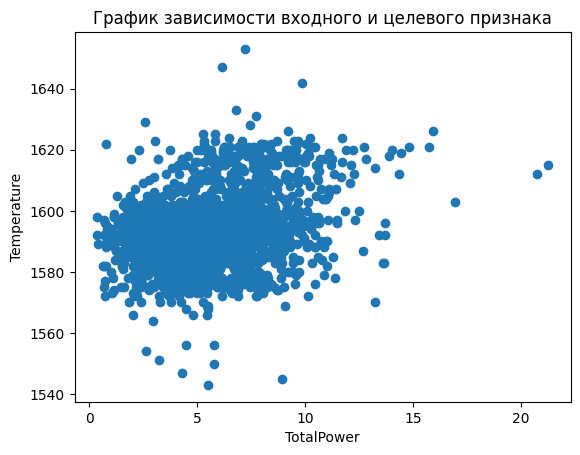

In [125]:
plt.scatter(features, target)
plt.title('График зависимости входного и целевого признака')
plt.xlabel('TotalPower')
plt.ylabel('Temperature')
plt.show()

__Вывод__: на графике зависимости `TotalPower` и `TemperatureLast` можно заметить связь между повышением мощности и повышением температуры, что в свою очередь свидетельствует о возможности экономии.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что не забываешь оценить важность признаков модели

## Вывод

На этапе обучения модели лучшее качество метрики MAE показал бустинг (`CatBoost`). Данные типы моделей отлично справлются с табличными данными. По результатам анализа было выявлено, что одним из основных факторов влияющих на точность предсказания температуры является мощность (сумма активной и реактивной мощности). 

На графике зависимости этих двух признаков видно, что одну и туже температуры можно достичь при разных показателях мощности, что как раз и может являтся источником экономии энергии.

Для дальнейшего улучшения модели рекомендуется скоректировать датчики синхронности времени, что позволит посмотреть на задачу с точки зрения временных рядов.

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера <a class="tocSkip"> </h2>    
    
 
У меня сложилось отличное впечатление о проекте, тебе удалось справиться с таким выпускным проектом. Молодец! Подготовлены данные для анализа, изучены все параметры. Все красиво визуализировано, построено несколько моделей регрессии и оценено их качество. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- в ходе проекта встречались  функции, помогающие избавиться от дублирования кода;
- много красивых визуализаций в проекте и хорошая интерпретация;
- при обучении моделей использована валидация и поиск гиперпараметров.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.
 
</div>


<div class="alert alert-info">
<h2> Комментарий студента:</h2>

<b>👋:</b> Спасибо за твоё ревью! Все критические замечания исправил, добавил комментария к ним
</div>  